# Emotion Detection using Machine Learning

## 1. Introduction

This notebook demonstrates a facial emotion detection system using Convolutional Neural Networks (CNN). The system is trained on the FER2013 dataset and can detect 7 different emotions in real-time using a webcam feed.

The emotions detected are:
- Angry
- Disgust
- Fear
- Happy
- Neutral
- Sad
- Surprise


## 2. Importing Libraries

In [18]:
# Install required packages if not already installed
# Uncomment and run if needed
%pip install opencv-python tensorflow pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Base libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

### Deep Learning Libraries

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

### Image processing


In [21]:
import cv2
from PIL import Image

### For Interative Display

In [22]:
from IPython.display import display, clear_output
import ipywidgets as widgets

## 3. Dataset Loading and Preprocessing

In [23]:
# Function to load the FER2013 dataset
def load_data(file_path="../data/fer2013.csv"):
    """
    Loads FER2013 dataset from CSV, preprocesses images, and returns dataset.
    """
    print(f"Loading dataset from: {file_path}")
    
    # Check if file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Dataset file not found at {file_path}")
    
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully with {len(df)} samples")
    
    # Display dataset information
    print("\nDataset structure:")
    print(df.head())
    print("\nEmotion distribution:")
    print(df['emotion'].value_counts())
    
    # Preprocess data
    X = np.array([np.fromstring(img, dtype=np.uint8, sep=' ') for img in df['pixels']])
    X = X.reshape(-1, 48, 48, 1) / 255.0  # Normalize pixel values
    
    y = to_categorical(df['emotion'], num_classes=7)
    
    return X, y

# Define emotion labels
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

In [24]:
# Load the dataset
# Update the path to match your dataset location
try:
    X, y = load_data("./data/fer2013.csv")
    print(f"\nDataset loaded: {X.shape[0]} images, {y.shape[1]} classes")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please update the file path to your dataset location")

Loading dataset from: ./data/fer2013.csv
Dataset loaded successfully with 35887 samples

Dataset structure:
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

Emotion distribution:
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

Dataset loaded: 35887 images, 7 classes


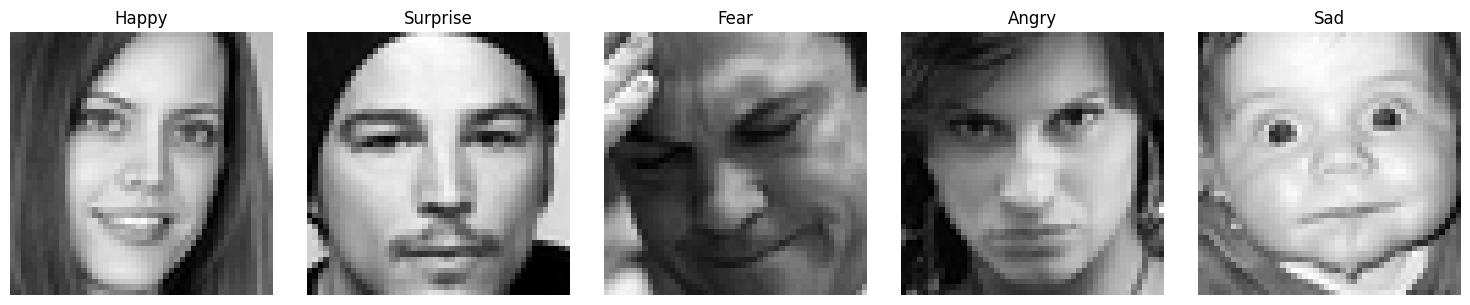

In [25]:
# Visualize sample images from the dataset
def visualize_samples(X, y, num_samples=5):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(len(X), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[idx].reshape(48, 48), cmap='gray')
        emotion_idx = np.argmax(y[idx])
        plt.title(emotion_labels[emotion_idx])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize samples
visualize_samples(X, y)

In [26]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

Training set: 28709 samples
Validation set: 7178 samples


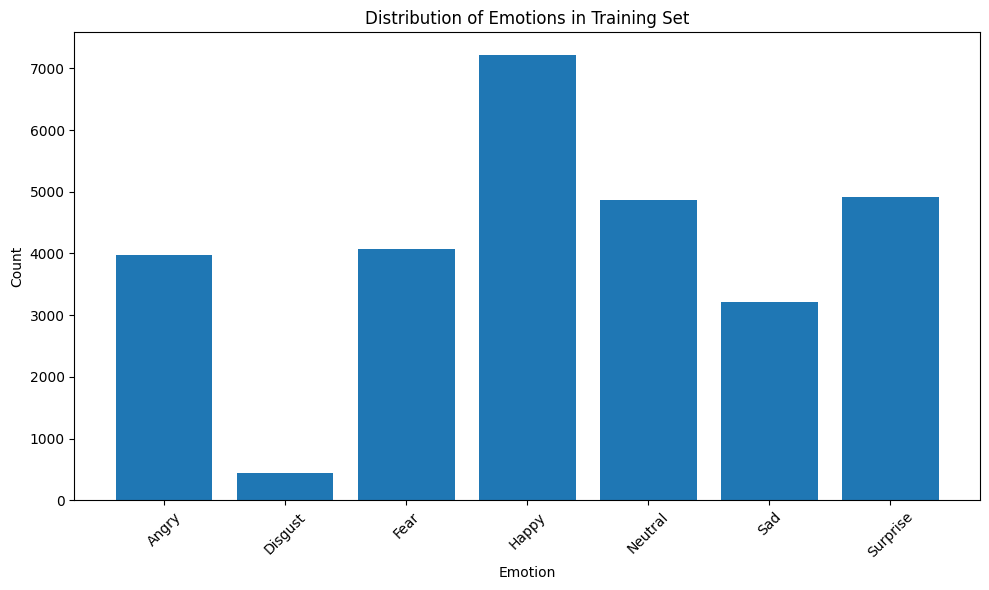

In [27]:
# Visualize the distribution of emotions in the training set
emotions_count = np.sum(y_train, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(emotion_labels, emotions_count)
plt.title('Distribution of Emotions in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Building the CNN Model

In [28]:
def build_cnn_model():
    """
    Builds and returns a CNN model for emotion detection
    """
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # 7 classes for FER2013
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

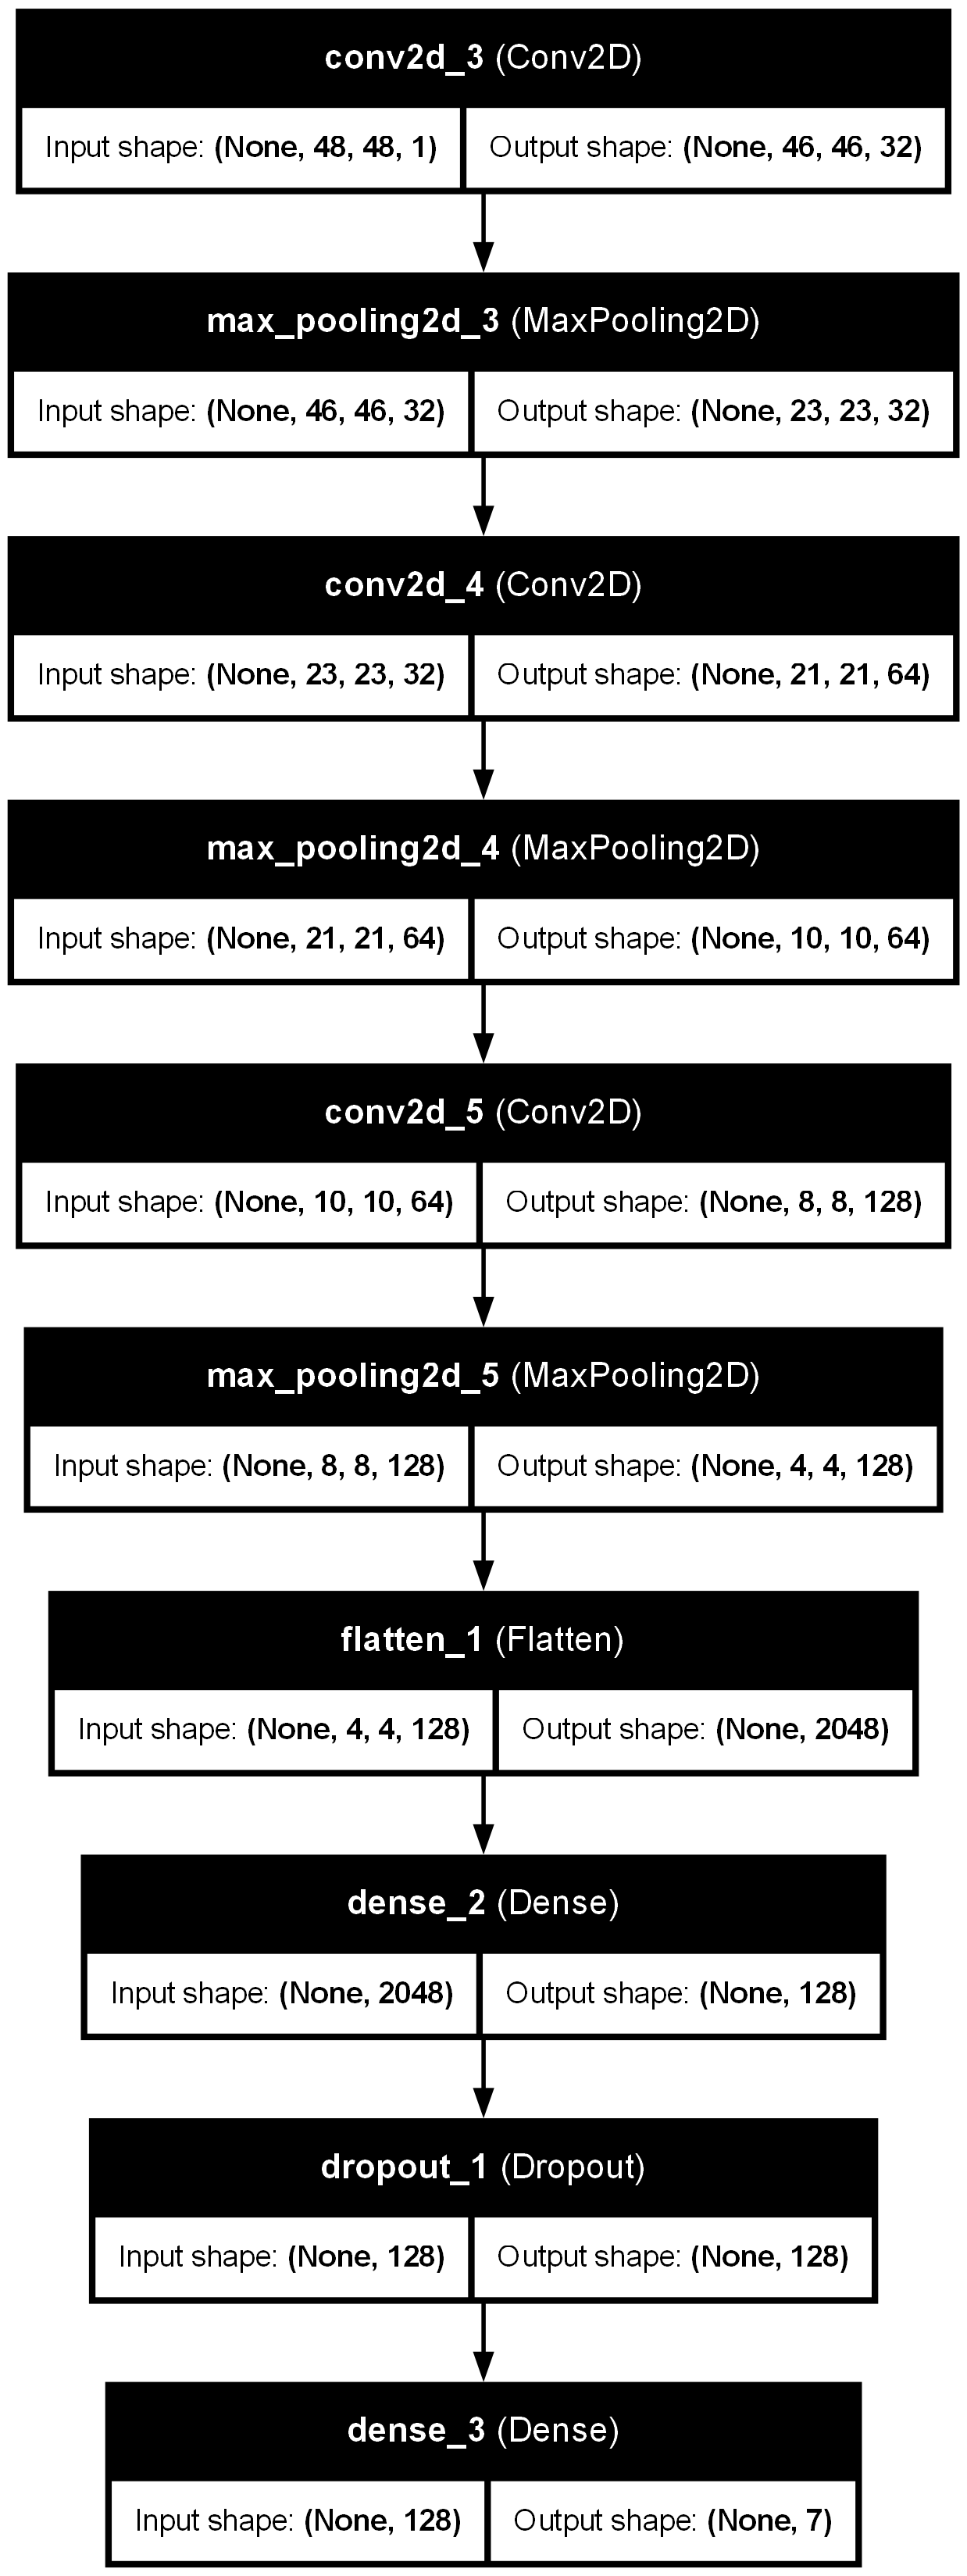

In [29]:
# Build the model
model = build_cnn_model()

# Display model summary
model.summary()

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from PIL import Image
from IPython.display import display
import os

# Ensure the directory exists
output_dir = r"C:\Users\HP\Desktop"
output_path = os.path.join(output_dir, "model_structure.png")
os.makedirs(output_dir, exist_ok=True)

# Save the model plot
plot_model(model, to_file=output_path, show_shapes=True, show_layer_names=True)

# Ensure the file is saved before attempting to open it
display(Image.open(output_path))


In [30]:
%pip install graphviz pydot


Note: you may need to restart the kernel to use updated packages.


## 5. Train the Model
We train the CNN model using the FER2013 dataset for 20 epochs.

In [31]:

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Save the trained model
model.save("emotion_detection_model.h5")
print("Model training complete and saved!")


Epoch 1/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.2484 - loss: 1.8107 - val_accuracy: 0.3564 - val_loss: 1.5994
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.3969 - loss: 1.5592 - val_accuracy: 0.4755 - val_loss: 1.3966
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4563 - loss: 1.4101 - val_accuracy: 0.5134 - val_loss: 1.3102
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4940 - loss: 1.3271 - val_accuracy: 0.5149 - val_loss: 1.2675
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.5190 - loss: 1.2689 - val_accuracy: 0.5327 - val_loss: 1.2306
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.5390 - loss: 1.2198 - val_accuracy: 0.5308 - val_loss: 1.2391
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.5559 - loss: 1.1836 - val_accuracy: 0.5433 - val_loss: 1.1990
Epoch 8/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5671 - loss: 1

Model training complete and saved!


## 6. Evaluate Model Performance
We visualize the training and validation accuracy over epochs.

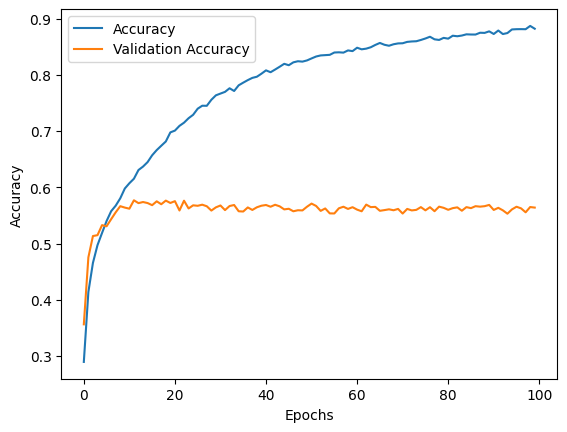

In [32]:

import matplotlib.pyplot as plt

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 7. Real-Time Emotion Detection
We use OpenCV to capture real-time facial expressions and detect emotions.

In [33]:

import cv2

# Load the trained model
model = tf.keras.models.load_model("emotion_detection_model.h5")

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Emotion labels
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Start webcam
cap = cv2.VideoCapture(0)
t=500
for _ in range(t):
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48)) / 255.0
        face = np.reshape(face, (1, 48, 48, 1))

        # Predict emotion
        predictions = model.predict(face)
        emotion = emotion_labels[np.argmax(predictions)]

        # Draw rectangle and label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Real-Time Emotion Detection", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


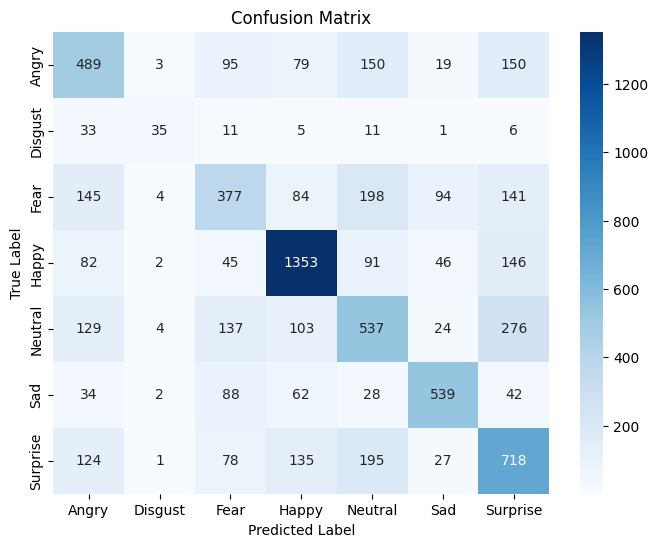

Classification Report:
               precision    recall  f1-score   support

       Angry       0.47      0.50      0.48       985
     Disgust       0.69      0.34      0.46       102
        Fear       0.45      0.36      0.40      1043
       Happy       0.74      0.77      0.75      1765
     Neutral       0.44      0.44      0.44      1210
         Sad       0.72      0.68      0.70       795
    Surprise       0.49      0.56      0.52      1278

    accuracy                           0.56      7178
   macro avg       0.57      0.52      0.54      7178
weighted avg       0.56      0.56      0.56      7178



In [34]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels))
